<a href="https://colab.research.google.com/github/ramendra1990/ee_workshop_2022/blob/main/second_order_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$
\frac{d^{2}y}{dx^2}=D\frac{dy}{dx}
$$
Solve this equation for D = 0.02, y[x = 0] = 5, y[x = N - 1] = 0, x 𝟄 [0, N)\
where N = len(x)

In [229]:
# Define variables
import numpy as np
D = 0.2
x = np.linspace(0, 5, 10)
y = np.zeros(x.shape)
y[0] = 5
dx = x[1] - x[0]
N = len(x)

In [230]:
dx

0.5555555555555556

## Method 1
### Iterative method
The equation is dictretized into following form\
$$
y^{i}=\frac{1}{2}[(1-r)y^{i+1}+(1+r)y^{i-1}]
$$
$$
r=\frac{D\Delta x}{2}
$$

In [231]:
r = 0.5 * D * dx
for i in range(1000):
  y[1 : N - 1] = 0.5 * ((1-r) * y[2 : N] + (1 + r) * y[0 : N - 2])

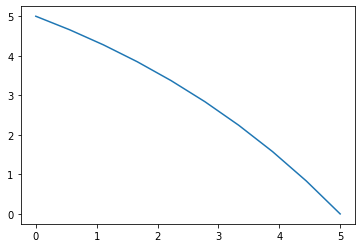

In [232]:
import matplotlib.pyplot as plt
plt.plot(x, y)

In [233]:
print(y)

[5.         4.65821835 4.27622709 3.84929568 3.37213705 2.8388421
 2.24280658 1.57664923 0.83212043 0.        ]


## Method 2
### Using linear algebra
The set of algebrain equations take the following form
$$
\left(\begin{array}{cc}
-2 & 1-r & 0 & \dots & 0 & 0 \\ 
1+r & -2 & 1-r & \dots & 0 & 0 \\
\vdots & \ddots & \vdots & \vdots & \vdots & \vdots\\ 
\vdots &  & \ddots & \\ 
0 & 0 & \dots & \dots & 1+r & -2 
\end{array}\right)
\left(\begin{array}{cc} 
y^1\\ 
y^2\\
\vdots\\
\vdots\\
y^{N-2}
\end{array}\right)=
\left(\begin{array}{cc} 
-(1+r)y^0\\ 
\vdots\\
\vdots\\
\vdots\\
-(1-r)y^{N-1}
\end{array}\right)
$$
\
where, $N = len(y)$.
Same matrix operation can also be written as
$AY=B$ and $Y=A^{-1}B$

In [234]:
# Using linear algebra
r = 0.5 * D * dx
y1 = np.zeros(x.shape)
y1[0] = 5
B = np.zeros((len(x) - 2, 1))
B[0] = -1 * (1 + r) * y1[0]
B[-1] = -1 * (1 - r) * y1[-1]


In [235]:
# Prepare the tri-diagonal matrix
mdiag = -2 * np.ones((len(x)- 2,))
ldiag = (1 + r) * np.ones((len(x)- 3,))
udiag = (1 - r) * np.ones((len(x)- 3,))
A = np.diag(mdiag, 0) + np.diag(udiag, 1) + np.diag(ldiag, -1)

In [236]:
y1 = y1.reshape((len(x), 1))
y1[1 : N - 1] = np.dot(np.linalg.inv(A), B)

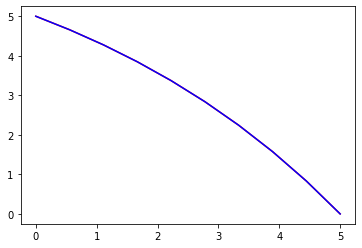

In [237]:
plt.plot(x, y1, 'r', label = 'y_Matrix_inversion')
plt.plot(x, y, 'b', label = 'y_iterative')

## <font color = 'red'>Exercise
Solve the same equation for D = 0.02, y[x = 0] = 5, $\frac{dy}{dx}[x = N - 1] = 0$, x 𝟄 [0, N)\
where N = len(x)